In [1]:
import random
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

The Monte Carlo method works by using random points to estimade ratios and values, the most basic example, shown here
is calculate the value of $\pi$ by comparing the ratio of a circle with the inscribed square.

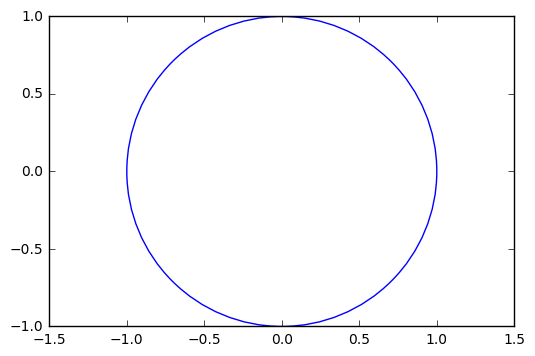

In [2]:
#First, lets plot a circle, centered arround 0 with a radius of 1
circle  = plt.Circle((0,0), 1, fill=False, color="blue")
fig, ax = plt.subplots()
ax.add_artist(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)
plt.show()

We know the area of the circle is $\pi r^2$ =,now , if we sample random points in the square, sice they are all equally probable, we know the chance of it belonging inside the circle is the area of the circle divided by the area of the square $\dfrac{\pi r^2}{A_{rectangle}^2}$, we can then calculate $\pi = \dfrac{P_{circle} \times A_{rectangle}}{r^2}$ where $P_{circle}$ is the probability a point is inside the circle, but, since our plot is not a square, and rather, a rectangle.

In [7]:
#Let's define a function for aproximating pi with a given number of points
def monte_carlo_pi(points, return_points=False):
    inside = 0
    point_list = []
    for i in range(points):
        x,y = (random.uniform(-1.5,1.5), random.uniform(-1,1))
        if sqrt(x**2+y**2) <= 1:
            inside += 1
        if return_points:
            point_list.append((x,y))
    pi = (inside/points) * (3*2)
    if not return_points:
        return pi
    return (pi, point_list)

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

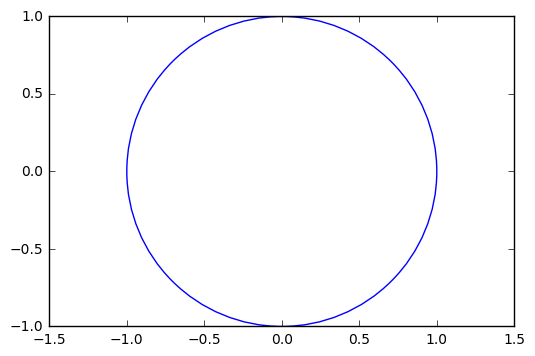

In [31]:
pi, points_list = monte_carlo_pi(1000,return_points=True)
circle  = plt.Circle((0,0), 1, fill=False, color="blue")
fig, ax = plt.subplots()
ax.add_artist(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)
plt.scatter(*zip(*points_list), )
plt.show()


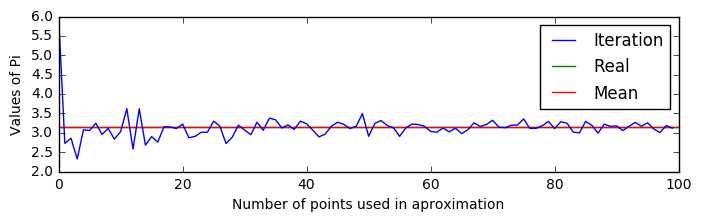

The approximated value of py is 3.1392


In [21]:
#Now, lets see how many points we need for a good estimation
plt.figure(figsize=(8, 2))
point_number = range(1, 1000,10)
estimated = [monte_carlo_pi(number) for number in point_number]
total_mean = sum(estimated)/ len(estimated)
plt.hlines(pi, 0, 100, color='green')
plt.hlines(total_mean, 0, 100, color='red')
plt.plot(estimated)
plt.legend(['Iteration', "Real", "Mean"], loc="best")
plt.xlabel("Number of points used in aproximation")
plt.ylabel("Values of Pi")
plt.show()
print("The approximated value of py is %.4f" % total_mean)

As we can see the approximation converges, if we take the mean, we can pretty approximate the value of $\pi$ very well.